# Goal: Analyzing the latest World Happiness Index data to answer following questions

### 1) How 2021 data compare to previous years?
### 2) How has Happiness varied over last 10 years across different regions?
### 3) Which available variables show high correlation with Happiness Score?

In [7]:
import numpy as np
import pandas as pd
import plotly.express as px

In [8]:
ls

2015.csv
2016.csv
2017.csv
2018.csv
2019.csv
2020.csv
2021.csv
API_SP.POP.TOTL_DS2_en_csv_v2_3628828.csv
Happiness-notebook.ipynb
README.md
world-happiness-report-2021.csv.xls
world-happiness-report.csv.xls


In [9]:
df_15 = pd.read_csv('2015.csv')
df_16 = pd.read_csv('2016.csv')
df_17 = pd.read_csv('2017.csv')
df_18 = pd.read_csv('2018.csv')
df_19 = pd.read_csv('2019.csv')
df_20 = pd.read_csv('2020.csv')
df_21 = pd.read_csv('2021.csv')

In [10]:
df_21.describe()

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,1.490000e+02,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.532839,0.058752,5.648007,5.417631,9.432208,0.814745,64.992799,0.791597,-0.015134,0.727450,2.430000e+00,0.977161,0.793315,0.520161,0.498711,0.178047,0.135141,2.430329
std,1.073924,0.022001,1.054330,1.094879,1.158601,0.114889,6.762043,0.113332,0.150657,0.179226,5.347044e-15,0.404740,0.258871,0.213019,0.137888,0.098270,0.114361,0.537645
min,2.523000,0.026000,2.596000,2.449000,6.635000,0.463000,48.478000,0.382000,-0.288000,0.082000,2.430000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.648000
25%,4.852000,0.043000,4.991000,4.706000,8.541000,0.750000,59.802000,0.718000,-0.126000,0.667000,2.430000e+00,0.666000,0.647000,0.357000,0.409000,0.105000,0.060000,2.138000
50%,5.534000,0.054000,5.625000,5.413000,9.569000,0.832000,66.603000,0.804000,-0.036000,0.781000,2.430000e+00,1.025000,0.832000,0.571000,0.514000,0.164000,0.101000,2.509000
75%,6.255000,0.070000,6.344000,6.128000,10.421000,0.905000,69.600000,0.877000,0.079000,0.845000,2.430000e+00,1.323000,0.996000,0.665000,0.603000,0.239000,0.174000,2.794000
max,7.842000,0.173000,7.904000,7.780000,11.647000,0.983000,76.953000,0.970000,0.542000,0.939000,2.430000e+00,1.751000,1.172000,0.897000,0.716000,0.541000,0.547000,3.482000


In [11]:
df2005_2020 = pd.read_csv('world-happiness-report.csv.xls')
df2005_2020.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


In [12]:
print('Date Range ' +str(df21_new['year'].min())+' to '+ str(df21_new['year'].max())) # missing 2021 data

NameError: name 'df21_new' is not defined

In [13]:
df_21.columns# == df2005_2020.columns

Index(['Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')

In [14]:
df2005_2020.columns

Index(['Country name', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect'],
      dtype='object')

In [15]:
df2005_2020.rename(columns = {'Life Ladder':'Ladder score', \
                              'Healthy life expectancy at birth':'Healthy life expectancy',\
                             }, inplace = True)

df_21.rename(columns = {'Logged GDP per capita':'Log GDP per capita'}, inplace = True)

In [16]:
# merging /region name to the main dataset
# left join to get all the rows in main dataset
# Only Run Once

df2005_2020 = df2005_2020.merge(df_21[['Country name', 'Regional indicator']], on = 'Country name', how = 'left')
#df2005_2020



In [17]:
df2005_2020.head()

,Country name,year,Ladder score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Regional indicator
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258,South Asia
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237,South Asia
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275,South Asia
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267,South Asia
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268,South Asia


In [18]:
df2005_2020[df2005_2020['Regional indicator'].isnull().values]['Country name'].unique()

array(['Angola', 'Belize', 'Bhutan', 'Central African Republic',
       'Congo (Kinshasa)', 'Cuba', 'Djibouti', 'Guyana', 'Oman', 'Qatar',
       'Somalia', 'Somaliland region', 'South Sudan', 'Sudan', 'Suriname',
       'Syria', 'Trinidad and Tobago'], dtype=object)

In [19]:
missing_ctry_names = df2005_2020[df2005_2020['Regional indicator'].isnull().values]['Country name'].unique()

In [20]:
df2005_2020[df2005_2020['Country name'].isin( missing_ctry_names)].year.unique() # 12 countries data ins missing in 2021 dataset

array([2011, 2012, 2013, 2014, 2007, 2015, 2010, 2016, 2017, 2009, 2006,
       2008])

In [21]:
df_21['year'] = 2021

In [22]:
temp = pd.concat([df2005_2020, df_21], ignore_index = True)
temp[temp['year'] == 2021]

,Country name,year,Ladder score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,...,upperwhisker,lowerwhisker,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
1949,Finland,2021,7.842,10.775,0.954,72.000,0.949,-0.098,0.186,NaN,...,7.904,7.780,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1950,Denmark,2021,7.620,10.933,0.954,72.700,0.946,0.030,0.179,NaN,...,7.687,7.552,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
1951,Switzerland,2021,7.571,11.117,0.942,74.400,0.919,0.025,0.292,NaN,...,7.643,7.500,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
1952,Iceland,2021,7.554,10.878,0.983,73.000,0.955,0.160,0.673,NaN,...,7.670,7.438,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
1953,Netherlands,2021,7.464,10.932,0.942,72.400,0.913,0.175,0.338,NaN,...,7.518,7.410,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2093,Lesotho,2021,3.512,7.926,0.787,48.700,0.715,-0.131,0.915,NaN,...,3.748,3.276,2.43,0.451,0.731,0.007,0.405,0.103,0.015,1.800
2094,Botswana,2021,3.467,9.782,0.784,59.269,0.824,-0.246,0.801,NaN,...,3.611,3.322,2.43,1.099,0.724,0.340,0.539,0.027,0.088,0.648
2095,Rwanda,2021,3.415,7.676,0.552,61.400,0.897,0.061,0.167,NaN,...,3.548,3.282,2.43,0.364,0.202,0.407,0.627,0.227,0.493,1.095
2096,Zimbabwe,2021,3.145,7.943,0.750,56.201,0.677,-0.047,0.821,NaN,...,3.259,3.030,2.43,0.457,0.649,0.243,0.359,0.157,0.075,1.205


In [23]:
#Keep only useful columns

temp = temp[['Country name', 'Regional indicator', 'year', 'Ladder score', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect']]
temp.head()

,Country name,Regional indicator,year,Ladder score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,South Asia,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,South Asia,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,South Asia,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,South Asia,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,South Asia,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


In [24]:
# Updating column names to asthetic ones

temp.rename(columns = {'Country name':'Country', 'Regional indicator':'Region'\
                      ,'year':'Year'\
                      ,'Ladder score':'Happiness score'}, inplace = True)

In [25]:
temp.head()

,Country,Region,Year,Happiness score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,South Asia,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,South Asia,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,South Asia,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,South Asia,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,South Asia,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


In [26]:
# added world population data

!ls

2015.csv
2016.csv
2017.csv
2018.csv
2019.csv
2020.csv
2021.csv
API_SP.POP.TOTL_DS2_en_csv_v2_3628828.csv
Happiness-notebook.ipynb
README.md
world-happiness-report-2021.csv.xls
world-happiness-report.csv.xls


In [27]:
world_pop = pd.read_csv('API_SP.POP.TOTL_DS2_en_csv_v2_3628828.csv')


In [28]:
world_pop.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,...,102050.0,102565.0,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,...,532760424.0,547482863.0,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,...,30117411.0,31161378.0,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,...,360285439.0,370243017.0,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0
4,Angola,AGO,"Population, total",SP.POP.TOTL,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,...,24220660.0,25107925.0,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0


In [29]:
world_pop['Indicator Name'].unique()

array(['Population, total'], dtype=object)

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
%matplotlib inline

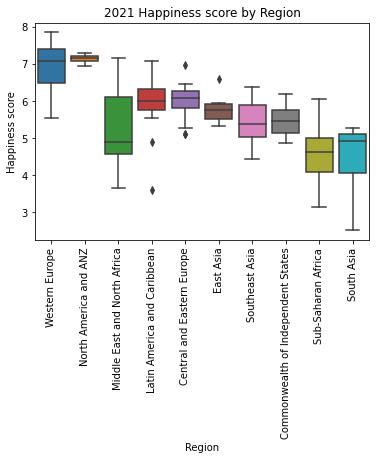

In [32]:

temp1 = temp[temp['Year']==2021]
ax = sns.boxplot(x="Region", y="Happiness score", data=temp1)
_ = ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
_ = ax.set(title = '2021 Happiness score by Region')

In [33]:
exclusion_2021 = ['Angola', 'Belize', 'Bhutan', 'Central African Republic',
       'Congo (Kinshasa)', 'Cuba', 'Djibouti', 'Guyana', 'Oman', 'Qatar',
       'Somalia', 'Somaliland region', 'South Sudan', 'Sudan', 'Suriname',
       'Syria', 'Trinidad and Tobago']


h_by_year = temp[~temp['Country'].isin(exclusion_2021)].groupby('Year')['Happiness score'].mean().sort_values(ascending = False).reset_index()
h_by_year.sort_values(by = 'Year', inplace = True)
h_by_year = h_by_year[h_by_year["Year"] > 2005]

fig = px.line(h_by_year, x="Year", y="Happiness score")
fig.show()

NameError: name 'px' is not defined

In [ ]:


exclusion_2021 = ['Angola', 'Belize', 'Bhutan', 'Central African Republic',
       'Congo (Kinshasa)', 'Cuba', 'Djibouti', 'Guyana', 'Oman', 'Qatar',
       'Somalia', 'Somaliland region', 'South Sudan', 'Sudan', 'Suriname',
       'Syria', 'Trinidad and Tobago']


h_by_year = temp[~temp['Country'].isin(exclusion_2021)][temp['Region'].isin(['East Asia', 'South Asia'])].groupby('Year')['Happiness score'].mean().sort_values(ascending = False).reset_index()
h_by_year.sort_values(by = 'Year', inplace = True)
h_by_year = h_by_year[h_by_year["Year"] > 2005]

fig = px.line(h_by_year, x="Year", y="Happiness score")
fig.show()

In [ ]:
h_by_year = temp.groupby(['Year','Region'])['Happiness score'].mean().sort_values(ascending = False).reset_index()
h_by_year.sort_values(by = ['Region','Year'], inplace = True)

h_by_year = h_by_year[h_by_year["Year"] >= 2019].reset_index()
#h_by_year['percent_change'] = h_by_year['Happiness score'].pct_change()

h_by_year

In [ ]:
h_by_year = temp.groupby(['Year','Country','Region'])['Happiness score'].mean().sort_values(ascending = False).reset_index()
h_by_year.sort_values(by = 'Year', inplace = True)
#h_by_year = h_by_year[(h_by_year["Year"] >= 2018) & (h_by_year["Region"] == 'South Asia')].reset_index()
h_by_year = h_by_year[h_by_year["Year"] >= 2019].reset_index()


fig = px.line(h_by_year, x="Year", y="Happiness score", color='Country')
fig.show()

In [ ]:

ax = sns.kdeplot(temp['Happiness score'], shade = True, label = '2021 Happiness Score', color = 'r')
ax = sns.kdeplot(temp1['Happiness score'], shade = True, label = '2021 Happiness Score', color = 'b')


_ = ax.set(title = '2021 Happiness score (Blue) distribution vs historical data (Red) ')

In [ ]:
import plotly.express as px

reg_yr_df = reg_yr_df[reg_yr_df['Year'] > 2010]

reg_yr_df.sort_values(by = ['Happiness score'], inplace = True)

fig = px.box(reg_yr_df, x="Region", 
             y="Happiness score"
             ,hover_name="Region", hover_data=["Year", "Happiness score"]
             #,animation_frame='Year'
             , width=900, height=600
             #color='Region',
             #,rotation = 90
            )
fig.show()

In [ ]:
temp.sort_values(by = 'Year', inplace = True)
temp

In [ ]:
import plotly.express as px

reg_yr_df = temp.groupby(['Region','Year'])['Happiness score'].mean().sort_values(ascending = False).reset_index()

fig = px.scatter(reg_yr_df, x="Year", 
             y="Happiness score"
             ,animation_frame='Region'
             , width=1200, height=600
             #color='Region',
             #size_max = 90
            )

fig.show()
reg_yr_df

In [ ]:
import plotly.graph_objects as go

# Create the basic figure
fig = go.Figure()

reg_yr_df = temp.groupby(['Region','Year'])['Happiness score'].mean().sort_values(ascending = False).reset_index()

reg_yr_df = reg_yr_df[reg_yr_df['Year']>2010]

# Loop through the states
for region in ['North America and ANZ', 'Western Europe',
       'Latin America and Caribbean', 'East Asia',
       'Central and Eastern Europe', 'Middle East and North Africa',
       'Commonwealth of Independent States', 'Southeast Asia',
       'South Asia', 'Sub-Saharan Africa']:
    # Subset the DataFrame
    df = reg_yr_df[reg_yr_df.Region == region]
    # Add a trace for each season
    fig.add_trace(go.Bar(x=df["Year"], y=df["Happiness score"], name=region))
    
# Create the slider elements
sliders = [
    {'steps':[
    {'method': 'update', 'label': 'North America and ANZ', 'args': [{'visible': [True, False, False, False, False, False, False, False, False, False]}]},
    {'method': 'update', 'label': 'Western Europe', 'args': [{'visible': [False, True, False, False, False, False, False, False, False, False]}]},
    {'method': 'update', 'label': 'Latin America and Caribbean', 'args': [{'visible': [False, False, True, False, False, False, False, False, False, False]}]},
    {'method': 'update', 'label': 'East Asia', 'args': [{'visible': [False, False, False, True, False, False, False, False, False, False]}]},
    {'method': 'update', 'label': 'Central and Eastern Europe', 'args': [{'visible': [False, False, False, False, True, False, False, False, False, False]}]},
    {'method': 'update', 'label': 'Middle East and North Africa', 'args': [{'visible': [False, False, False, False, False, True, False, False, False, False]}]},
    {'method': 'update', 'label': 'Commonwealth of Independent States', 'args': [{'visible': [False, False, False, False, False, False, True, False, False, False]}]},
    {'method': 'update', 'label': 'Southeast Asia', 'args': [{'visible': [False, False, False, False, False, False, False, True, False, False]}]},
    {'method': 'update', 'label': 'South Asia', 'args': [{'visible': [False, False, False, False, False, False, False, False, True, False]}]},
    {'method': 'update', 'label': 'Sub-Saharan Africa', 'args': [{'visible': [False, False, False, False, False, False, False, False, False, True]}]},
    
    
    ]}]

# Update the figure to add sliders and show
fig.update_layout({'sliders': sliders})

# Show the plot
fig.show()

In [ ]:
reg_yr_df

In [ ]:
import plotly
from plotly.graph_objs import Bar, Layout, Figure

region_df = temp1.groupby('Region')['Happiness score'].mean().sort_values(ascending = False).reset_index()

data = [Bar(x = country_df['Region'], y = country_df['Happiness score'], text = country_df['Region'])]
layout = Layout(title = "Regions with Highest Mean Happiness Score in 2021")

fig = Figure(data = data, layout = layout)

plotly.offline.iplot(fig,show_link = False)

In [ ]:
#Top 10 countries

country_df = temp1.groupby('Country')['Happiness score'].mean().sort_values(ascending = False).reset_index()[:10]

data = [Bar(x = country_df['Country'], y = country_df['Happiness score'], text = country_df['Country'])]
layout = Layout(title = "Top 10 Countries with Highest Median Happiness Score in 2021")

fig = Figure(data = data, layout = layout)

plotly.offline.iplot(fig,show_link = False)

In [ ]:
#Bottom 10 countries

country_df = temp1.groupby('Country')['Happiness score'].mean().sort_values(ascending = True).reset_index()[:10]

data = [Bar(x = country_df['Country'], y = country_df['Happiness score'], text = country_df['Country'])]
layout = Layout(title = "Top 10 Countries with Highest Median Happiness Score in 2021")

fig = Figure(data = data, layout = layout)

plotly.offline.iplot(fig,show_link = False)

In [ ]:
temp.head()

In [ ]:
plotting_var = 'Perceptions of corruption'

region_df = temp.groupby(['Region','Year'])[plotting_var].mean().sort_values(ascending = True).reset_index()

g = sns.FacetGrid(region_df, col='Region', 
                height=5, 
                col_wrap=3)
g.map_dataframe(sns.scatterplot, 
                x="Year", 
                y=plotting_var
               
               )

g.add_legend()

In [ ]:

plotting_var = 'Happiness score'

region_df = temp.groupby(['Region','Year'])[plotting_var].mean().sort_values(ascending = True).reset_index()

sns.relplot(x="Year", y=plotting_var, hue="Region", data=region_df)

In [ ]:
temp1.columns

In [ ]:
sns.pairplot(temp1[['Country', 'Region','Happiness score', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices']], hue="Region")

In [ ]:
sns.pairplot(temp1[['Country', 'Region','Happiness score', 'Generosity',
       'Perceptions of corruption']], hue="Region")

In [ ]:
cor = temp1[['Country', 'Region', 'Happiness score', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']]

In [ ]:
cor = temp1[['Country', 'Region', 'Happiness score', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']]
mask = np.triu(np.ones_like(cor.corr(), dtype=np.bool_))
heatmap = sns.heatmap(cor.corr(), mask = mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':22}, pad=12);
# save heatmap as .png file
# dpi - sets the resolution of the saved image in dots/inches
# bbox_inches - when set to 'tight' - does not allow the labels to be cropped
#plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')
sns.set(rc = {'figure.figsize':(16,6)})